In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [6]:
train = pd.read_csv(r"C:\Users\prash\OneDrive\Documents\CTC\Python Files\Python Rahul Sir New\train 1.csv")
test = pd.read_csv(r"C:\Users\prash\OneDrive\Documents\CTC\Python Files\Python Rahul Sir New\test 1.csv")

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
print(train.shape)
print(test.shape)

(54808, 14)
(23490, 13)


In [9]:
print(train.isnull().sum())
print(test.isnull().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64
employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


In [10]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [11]:
train['education'].replace(np.nan,"Bachelor's",inplace=True)
test['education'].replace(np.nan,"Bachelor's",inplace=True)

In [12]:
train['previous_year_rating'].replace(np.nan,3.,inplace=True)
test['previous_year_rating'].replace(np.nan,3.,inplace=True)

<AxesSubplot:>

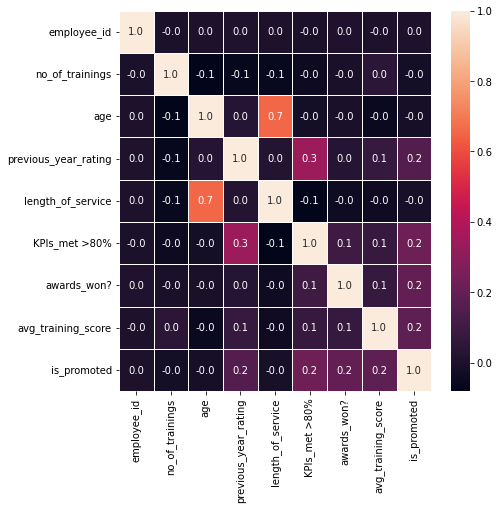

In [13]:
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(train.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

In [14]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [15]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [16]:
le = preprocessing.LabelEncoder()

train['department'] = le.fit_transform(train['department'])
test['department'] = le.transform(test['department'])

train['region'] = le.fit_transform(train['region'])
test['region'] = le.transform(test['region'])

train['education'] = le.fit_transform(train['education'])
test['education'] = le.transform(test['education'])

train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.transform(test['gender'])

train['recruitment_channel'] = le.fit_transform(train['recruitment_channel'])
test['recruitment_channel'] = le.transform(test['recruitment_channel'])

In [17]:
train["recruitment_channel"].value_counts()

0    30446
2    23220
1     1142
Name: recruitment_channel, dtype: int64

In [18]:
Y=train['is_promoted']
X=train.drop(['employee_id','is_promoted', 'age'],axis=1)
X1=X.values
Y1=Y.values

test1 = test.drop(['employee_id', 'age'],axis=1)
test1=test1.values


In [19]:
X1

array([[ 7., 31.,  2., ...,  1.,  0., 49.],
       [ 4., 14.,  0., ...,  0.,  0., 60.],
       [ 7., 10.,  0., ...,  0.,  0., 50.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0., 79.],
       [ 7., 33.,  0., ...,  0.,  0., 45.],
       [ 2., 14.,  0., ...,  0.,  0., 49.]])

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
model = RandomForestClassifier()

In [22]:
model.fit(X1,Y1)

RandomForestClassifier()

In [23]:
predict_train = model.predict(X1)

In [24]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(Y1, predict_train))
print('Precision:', metrics.precision_score(Y1, predict_train))
print('Recall:', metrics.recall_score(Y1, predict_train))
print('F measure:', metrics.f1_score(Y1, predict_train))

Accuracy: 0.9961501970515253
Precision: 0.9942337547127966
Recall: 0.9603684661525278
F measure: 0.9770077367331371


In [25]:
predict_test = model.predict(test1)

In [26]:
test["Predictions"] = predict_test

In [27]:
test.to_csv("Predictions.csv")

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
# Apply transform to both the training set and the test set.
train1 = scaler.transform(X)
test2 = scaler.transform(test1)

C:\Users\prash\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
model.fit(train1,Y)

RandomForestClassifier()

In [30]:
predict_test1 = model.predict(test2)

In [31]:
test["Predictions"] = predict_test

In [32]:
test.to_csv("Predictions.csv")

In [33]:
model.feature_importances_

array([0.10821651, 0.15641784, 0.01939504, 0.02441912, 0.03396017,
       0.027978  , 0.05724179, 0.14300424, 0.047807  , 0.03108004,
       0.35048024])